## Problem Statement
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Wild blueberry Yield Prediction Dataset. (Since this is Playground 3.14, it seems like we need a Blueberry Pie joke here?) Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,7]

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print('train shape',train.shape)
print('test shape',test.shape)

train shape (15289, 18)
test shape (10194, 17)


In [4]:
combined=pd.concat([train,test],ignore_index=True)
combined.shape

(25483, 18)

In [5]:
combined.head(5)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [6]:
# Describe
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
id,25483.0,12741.000000,7356.452791,0.000000,6370.500000,12741.000000,19111.500000,25482.000000
clonesize,25483.0,19.741200,6.593895,10.000000,12.500000,25.000000,25.000000,40.000000
honeybee,25483.0,0.390231,0.373249,0.000000,0.250000,0.500000,0.500000,18.430000
bumbles,25483.0,0.286584,0.059896,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,25483.0,0.492136,0.148134,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,25483.0,0.592702,0.139650,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,25483.0,82.184739,9.149237,69.700000,77.400000,86.000000,86.000000,94.600000
MinOfUpperTRange,25483.0,49.682851,5.548662,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,25483.0,68.668881,7.644002,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,25483.0,59.240309,6.613090,50.200000,55.800000,62.000000,62.000000,68.200000


In [7]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25483 entries, 0 to 25482
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25483 non-null  int64  
 1   clonesize             25483 non-null  float64
 2   honeybee              25483 non-null  float64
 3   bumbles               25483 non-null  float64
 4   andrena               25483 non-null  float64
 5   osmia                 25483 non-null  float64
 6   MaxOfUpperTRange      25483 non-null  float64
 7   MinOfUpperTRange      25483 non-null  float64
 8   AverageOfUpperTRange  25483 non-null  float64
 9   MaxOfLowerTRange      25483 non-null  float64
 10  MinOfLowerTRange      25483 non-null  float64
 11  AverageOfLowerTRange  25483 non-null  float64
 12  RainingDays           25483 non-null  float64
 13  AverageRainingDays    25483 non-null  float64
 14  fruitset              25483 non-null  float64
 15  fruitmass          

In [8]:
# Checking for null values
combined.isnull().sum()

id                          0
clonesize                   0
honeybee                    0
bumbles                     0
andrena                     0
osmia                       0
MaxOfUpperTRange            0
MinOfUpperTRange            0
AverageOfUpperTRange        0
MaxOfLowerTRange            0
MinOfLowerTRange            0
AverageOfLowerTRange        0
RainingDays                 0
AverageRainingDays          0
fruitset                    0
fruitmass                   0
seeds                       0
yield                   10194
dtype: int64

no null values

In [9]:
# Columns
combined.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

### Univarate  Analysis

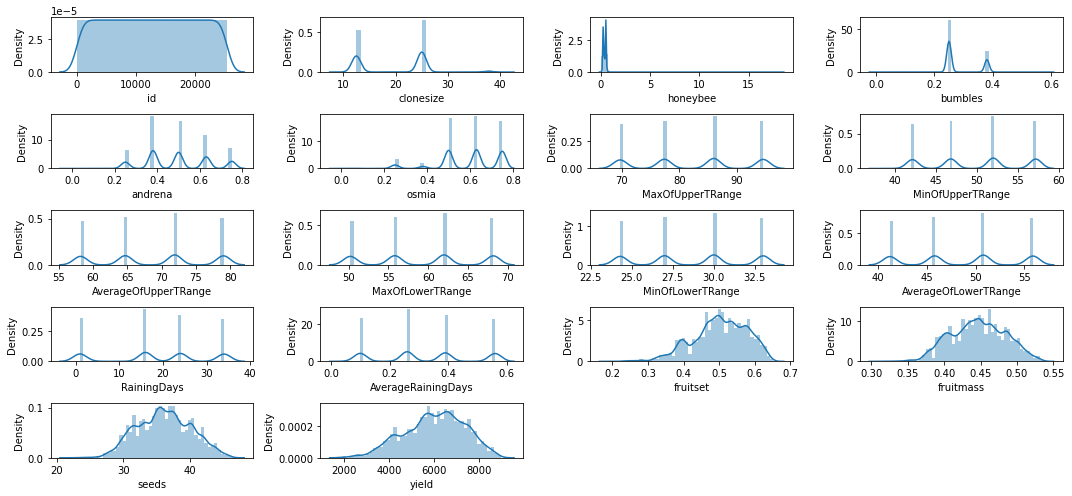

In [10]:
it=1
for i in combined.columns:
    plt.subplot(5,4,it)
    sns.distplot(combined[i])
    it+=1
plt.tight_layout()
plt.show()

-0.29119496049488897


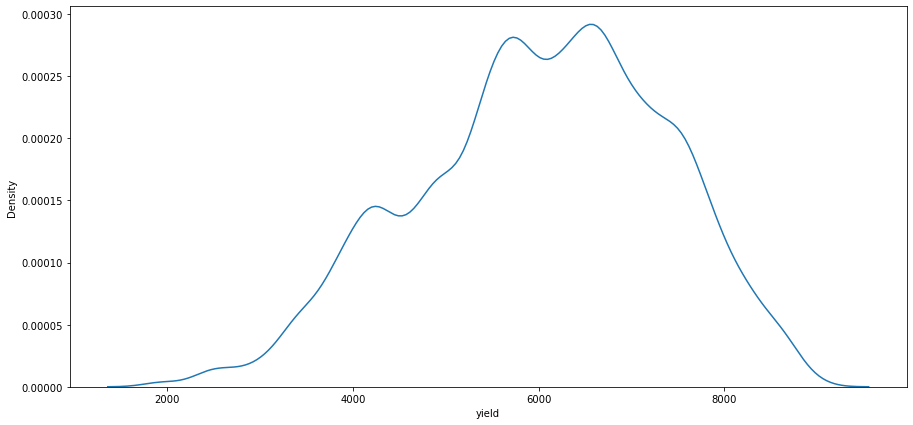

In [11]:
# Target variable
sns.kdeplot(combined['yield'])
print(combined['yield'].skew())
plt.show()

It is left skewed

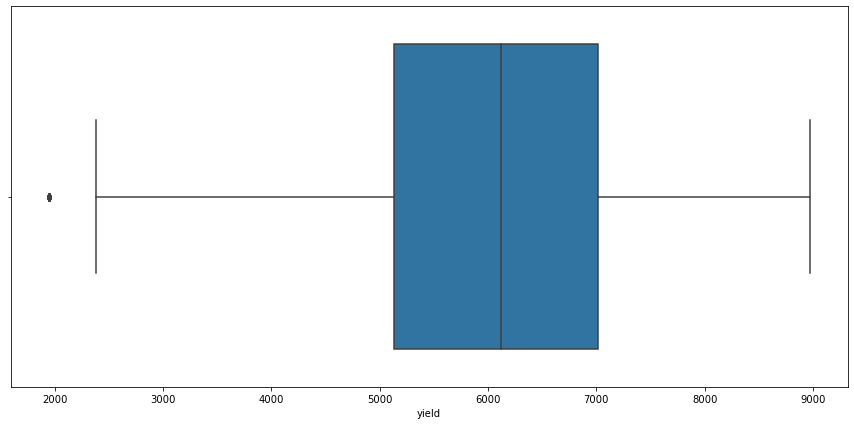

In [12]:
sns.boxplot(combined['yield'])
plt.show()

There is one outlier

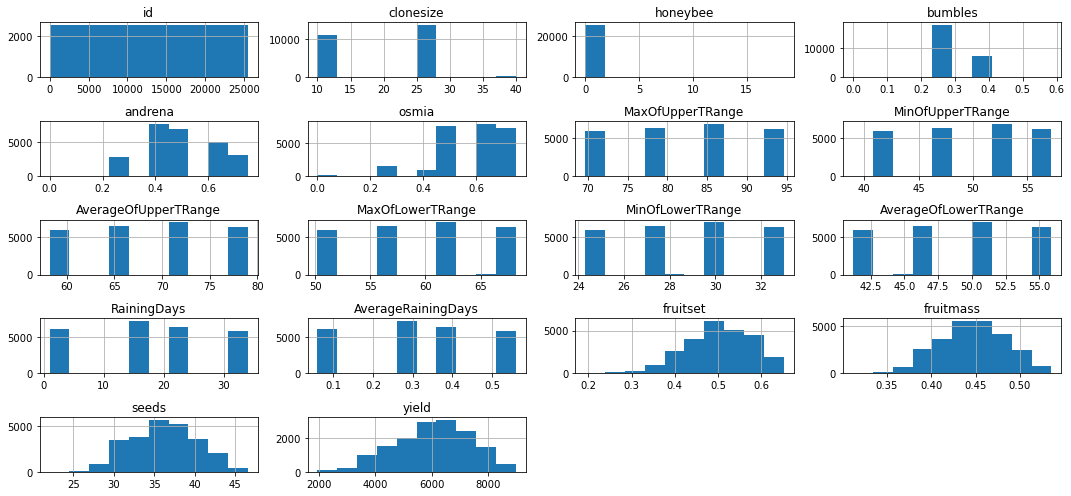

In [13]:
combined.hist()
plt.tight_layout()

## Bivariate Analysis

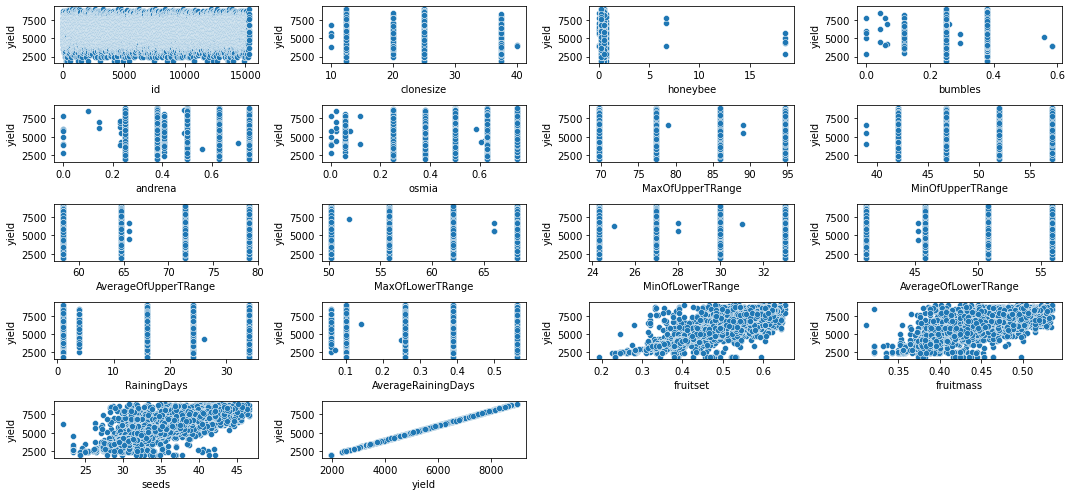

In [14]:
it=1
for i in combined.columns:
    plt.subplot(5,4,it)
    sns.scatterplot(combined[i],combined['yield'])
    it+=1
plt.tight_layout()
plt.show()

There is linear relationship of fruitset, fruitmass, seeds with the target variable.

## Multivariant Analysis

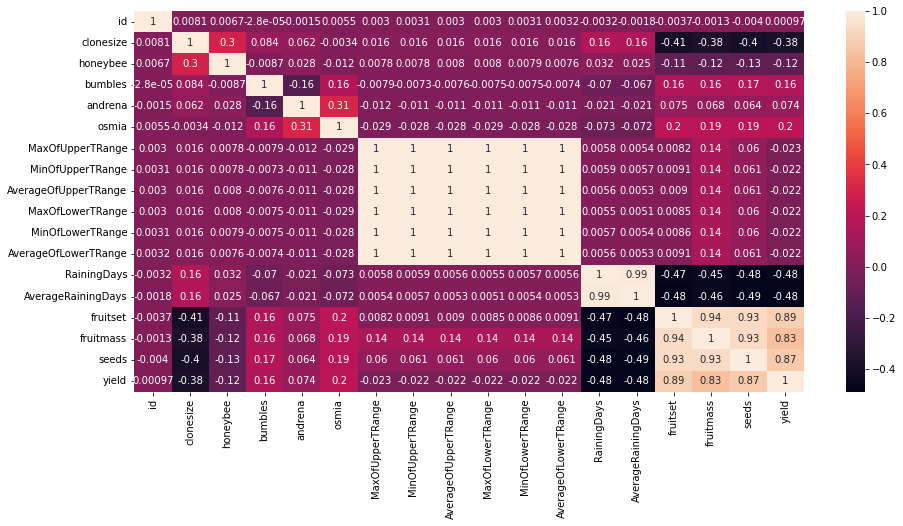

In [15]:
sns.heatmap(combined.corr(),annot=True)
plt.show()

* Target column is highly correlated with fruitset,fruitmass and seeds
*  We can observe multicollinearity between many columns
*  It seems like Trange 6 columns are repeated so dropped all keeping one which is highly correlated with target than others-MaxofUpperTrange
* RainingDays and AverageRainingDays also are highly correlated

In [16]:
df=combined.drop(columns=['id','MinOfUpperTRange','AverageOfUpperTRange',
                          'MaxOfLowerTRange','MinOfLowerTRange','AverageOfLowerTRange'])
df.head(5)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [17]:
# Dropping Average Raining days because it is multicollinear with the Raining days.
df=df.drop(columns=['AverageRainingDays'])
df.head(5)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,24.0,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,24.0,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,24.0,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,24.0,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,24.0,0.579677,0.494165,40.484512,7479.93417


## Outlier Detector

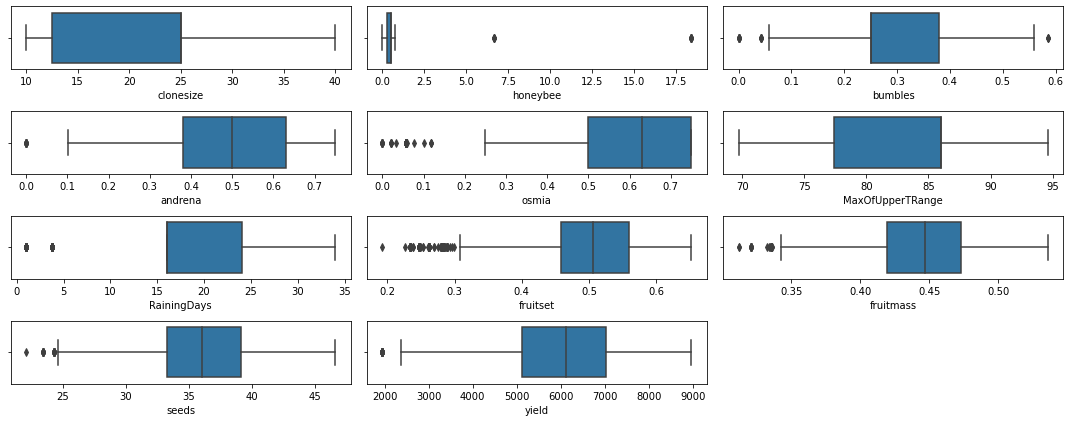

In [18]:
it=1
for i in df.columns:
    plt.subplot(5,3,it)
    sns.boxplot(df[i])
    it+=1
plt.tight_layout()
plt.show()

There are Oultliers in the data.

## Split the data into train and test

In [19]:
train.shape,test.shape

((15289, 18), (10194, 17))

In [20]:
newtrain=df.loc[0:train.shape[0]-1,:]
newtrain.shape

(15289, 11)

In [21]:
newtest=df.loc[train.shape[0]:,:]
newtest.drop('yield',axis=1,inplace=True)
newtest

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,fruitmass,seeds
15289,25.0,0.25,0.25,0.25,0.25,86.0,24.0,0.399367,0.408088,31.394569
15290,12.5,0.25,0.25,0.75,0.63,94.6,1.0,0.488048,0.442866,36.846956
15291,12.5,0.25,0.25,0.63,0.63,86.0,16.0,0.583379,0.487057,40.037644
15292,25.0,0.50,0.38,0.38,0.63,86.0,16.0,0.433014,0.422847,33.116091
15293,37.5,0.75,0.25,0.25,0.25,94.6,24.0,0.360996,0.388860,29.558019
...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,24.0,0.474162,0.437923,34.525258
25479,25.0,0.50,0.25,0.50,0.75,77.4,16.0,0.482854,0.440676,35.648221
25480,25.0,0.50,0.38,0.50,0.50,77.4,16.0,0.568854,0.463065,37.724724
25481,12.5,0.25,0.25,0.38,0.50,94.6,34.0,0.407374,0.409261,31.881847


In [22]:
newtest.shape

(10194, 10)

## Statistical Test

In [23]:
significant_feat=[]
for i in newtrain.columns:
    if i!= 'yield':
        if stats.ttest_ind(newtrain[i],newtrain['yield'])[1]<0.05:
            print(i,stats.ttest_ind(newtrain[i],newtrain['yield'])[1])
            significant_feat.append(i)
        else:
            print(i,stats.ttest_ind(newtrain[i],newtrain['yield'])[1])
print('Significant features are ',significant_feat)

clonesize 0.0
honeybee 0.0
bumbles 0.0
andrena 0.0
osmia 0.0
MaxOfUpperTRange 0.0
RainingDays 0.0
fruitset 0.0
fruitmass 0.0
seeds 0.0
Significant features are  ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'RainingDays', 'fruitset', 'fruitmass', 'seeds']


## Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in newtest.columns:
    newtrain.loc[:,i]=ss.fit_transform(pd.DataFrame(newtrain.loc[:,i]))
    newtest.loc[:,i]=ss.transform(pd.DataFrame(newtest.loc[:,i]))

In [25]:
newtrain.head(5)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,fruitmass,seeds,yield
0,0.802929,0.306073,-0.613664,1.737386,-0.662120,-1.363365,0.458012,-1.044938,-0.783260,-0.918905,4476.81146
1,0.802929,0.306073,-0.613664,0.049454,-0.662120,-1.363365,0.458012,-0.777454,-0.661588,-0.572230,5548.12201
2,-1.092448,-0.385238,-0.613664,0.927179,0.269883,0.418756,0.458012,0.674659,0.656157,0.540029,6869.77760
3,-1.092448,-0.385238,-0.613664,0.927179,-0.662120,-0.521504,0.458012,0.850087,0.852832,0.819312,6880.77590
4,0.802929,0.306073,-0.613664,0.927179,0.269883,-0.521504,0.458012,1.034261,1.285628,1.071598,7479.93417


In [26]:
newtest.head(5)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,fruitmass,seeds
15289,0.802929,-0.385238,-0.613664,-1.638479,-2.454434,0.418756,0.458012,-1.389674,-1.038628,-1.183437
15290,-1.092448,-0.385238,-0.613664,1.737386,0.269883,1.359016,-1.515018,-0.197520,-0.099560,0.169192
15291,-1.092448,-0.385238,-0.613664,0.927179,0.269883,0.418756,-0.228259,1.084029,1.093698,0.960739
15292,0.802929,0.306073,1.556078,-0.760754,0.269883,0.418756,-0.228259,-0.937347,-0.640116,-0.756362
15293,2.698305,0.997385,-0.613664,-1.638479,-2.454434,1.359016,0.458012,-1.905506,-1.557820,-1.639049


## Modelling

In [27]:
# Import the Liberies
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold



In [28]:
x=newtrain.drop('yield',axis=1)
y=newtrain['yield']

## Linear Regression 

In [48]:
import statsmodels.api as sma
newx=sma.add_constant(x)
model=sma.OLS(y,newx).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     6500.
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        21:41:43   Log-Likelihood:            -1.1906e+05
No. Observations:               15289   AIC:                         2.382e+05
Df Residuals:                   15278   BIC:                         2.382e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6025.1940      4.719   1276.870      0.000    6015.945    6034.443
clonesize          -30.3520      5.531     -5.488      0.000     -41.193     -19.511
honeybee            -0.2768      4.975     -0.056      0.956     -10.028       9.475
bumbles             22.0824      5.059      4.365      0.000      12.167      31.998
andrena             18.0204      5.140      3.506      0.000       7.946      28.095
osmia                7.7831      5.167      1.506      0.132      -2.344      17.910
MaxOfUpperTRange   -26.0686      5.159     -5.053      0.000     -36.181     -15.956
RainingDays        -80.5088      5.404    -14.898      0.000     -91.101     -69.917
fruitset           887.9488     16.165     54.929      0.000     856.263     919.635
fruitmass         -290.0167     16.573    -17.499      0.000    -322.502    -257.531
seeds              550.7157     14.768     37.290      0.000     521.768     579.664
==============================================================================
Omnibus:                     3073.283   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63299.568
Skew:                           0.422   Prob(JB):                         0.00
Kurtosis:                      12.932   Cond. No.                         8.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
lr=LinearRegression()
pred=[]
for train_index,test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(lr.fit(xtrain,ytrain).predict(newtest))
finalpred=pd.DataFrame(pred).T.mean(axis=1)


In [53]:
sub=pd.DataFrame({'id':test.id,
                'yield':finalpred})
sub.to_csv('LinearRegression.csv',index=False)   #363.00

## Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
rf=RandomForestRegressor()
pred=[]
for train_index,test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(newtest))
finalpred=pd.DataFrame(pred).T.mean(axis=1)


In [55]:
sub=pd.DataFrame({'id':test.id,
                'yield':finalpred})
sub.to_csv('Randomforestregressor.csv',index=False)   #351.83

## Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
dt=DecisionTreeRegressor()
pred=[]
for train_index,test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(dt.fit(xtrain,ytrain).predict(newtest))
finalpred=pd.DataFrame(pred).T.mean(axis=1)

In [30]:
sub=pd.DataFrame({'id':test.id,
                'yield':finalpred})
sub.to_csv('DecisionTreeregressor.csv',index=False)   #415.16

## Ada Boosting 

In [31]:
from sklearn.ensemble import AdaBoostRegressor
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
ad=AdaBoostRegressor()
pred=[]
for train_index,test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(ad.fit(xtrain,ytrain).predict(newtest))
finalpred=pd.DataFrame(pred).T.mean(axis=1)

In [32]:
sub=pd.DataFrame({'id':test.id,
                'yield':finalpred})
sub.to_csv('Adaboostregressor.csv',index=False)  #538.68

## Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
gb=GradientBoostingRegressor()
pred=[]
for train_index,test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(gb.fit(xtrain,ytrain).predict(newtest))
finalpred=pd.DataFrame(pred).T.mean(axis=1)

In [34]:
sub=pd.DataFrame({'id':test.id,
                'yield':finalpred})
sub.to_csv('Gradientboosting.csv',index=False) # 346.45

## XGBOOST

In [35]:
from xgboost import XGBRegressor
xg=XGBRegressor()
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
pred=[]
for train_index,test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(xg.fit(xtrain,ytrain).predict(newtest))
finalpred=pd.DataFrame(pred).T.mean(axis=1)

In [36]:
sub=pd.DataFrame({'id':test.id,
                'yield':finalpred})
sub.to_csv('Xgboost.csv',index=False) # 349.04

## Lightgbm

In [37]:
from lightgbm import LGBMRegressor
lg=LGBMRegressor()
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
pred=[]
for train_index,test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(lg.fit(xtrain,ytrain).predict(newtest))
finalpred=pd.DataFrame(pred).T.mean(axis=1)

In [38]:
sub=pd.DataFrame({'id':test.id,
                'yield':finalpred})
sub.to_csv('Lightgbm.csv',index=False) # 344.72

## Stacking 

In [44]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
xg=XGBRegressor()

base=[('randomf',rf),('Gradient',gb),('xgboost',xg)]
final=LGBMRegressor()
stack=StackingRegressor(estimators=base,final_estimator=final)

kf=KFold()
pred_stack=[]

for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_stack.append(stack.fit(xtrain,ytrain).predict(newtest))
final_pred=pd.DataFrame(pred_stack).T.mean(axis=1)

In [46]:
sub=pd.DataFrame({'id':test.id,
                'yield':finalpred})
sub.to_csv('stacking.csv',index=False)    # 363

### Hypertuning the lightgbm

In [47]:
from sklearn.model_selection import GridSearchCV

lg=LGBMRegressor()
kfold=KFold()

params={'n_estimators':[100,200,300],
       'max_depth':[2,3,4,5,6,7,8],
       'learning_rate':[0.1,0.09,0.01,0.2,0.4,0.18]}
for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    
cv=GridSearchCV(estimator=lg,param_grid=params,cv=3,scoring='neg_mean_absolute_error')
cv.fit(xtrain,ytrain)
cv.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [49]:
lg=LGBMRegressor(n_estimators=100,max_depth=4,learning_rate=0.1)
kf=KFold()
pred_lg1=[]
for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_lg1.append(lg.fit(xtrain,ytrain).predict(newtest))
final_pred=pd.DataFrame(pred_lg1).T.mean(axis=1)

In [50]:
sub=pd.DataFrame({'id':test.id,
                'yield':finalpred})
sub.to_csv('gridlightgbm.csv',index=False) 

In [51]:
from sklearn.model_selection import GridSearchCV
gb=GradientBoostingRegressor()
kf=KFold()

paramgrid={
    'n_estimators':[100,200,300],
    'max_depth':[2,3,4,None],
    'learning_rate':[0.1,0.001,0.2,0.4],
    'min_samples_split':[2,4,6,8]}

for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
        
cv=GridSearchCV(estimator=gb,param_grid=paramgrid,cv=3)
cv.fit(xtrain,ytrain)
cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 6,
 'n_estimators': 200}

In [53]:
gb=GradientBoostingRegressor(n_estimators= 200,max_depth=3,learning_rate=6,min_samples_split=0.1)
kf=KFold()
pred_gb1=[]
for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_gb1.append(gb.fit(xtrain,ytrain).predict(newtest))
final_pred=pd.DataFrame(pred_gb1).T.mean(axis=1)

In [54]:
sub=pd.DataFrame({'id':test.id,
                 'yield':final_pred})
sub.to_csv('Gradientboosting_hypertuned.csv',index=False)   